In [1]:
using Distances
using DataStructures
using TextModel
using SimilaritySearch
using JSON
using PyCall
using PyPlot
using Interact
@pyimport sklearn.datasets as datagen
include("../src/fft.jl")


Use "abstract type Language end" instead.

Use "abstract type DanishLanguage<:Language end" instead.

Use "abstract type DutchLanguage<:Language end" instead.

Use "abstract type EnglishLanguage<:Language end" instead.

Use "abstract type FinnishLanguage<:Language end" instead.

Use "abstract type FrenchLanguage<:Language end" instead.

Use "abstract type GermanLanguage<:Language end" instead.

Use "abstract type HungarianLanguage<:Language end" instead.

Use "abstract type ItalianLanguage<:Language end" instead.

Use "abstract type NorwegianLanguage<:Language end" instead.

Use "abstract type PortugueseLanguage<:Language end" instead.

Use "abstract type RomanianLanguage<:Language end" instead.

Use "abstract type RussianLanguage<:Language end" instead.

Use "abstract type SpanishLanguage<:Language end" instead.

Use "abstract type SwedishLanguage<:Language end" instead.

Use "abstract type TurkishLanguage<:Language end" instead.

Use "abstract type AbstractDocument end" instead.

Us

fft (generic function with 2 methods)

In [32]:
function plot_clusters(data,labels,centers)
    colors=["ro","bo","go","mo","co","yo",
        "r^","b^","g^","m^","c^","y^",
        "r*","b*","g*","m*","c*","y*"]
    ci=1
    for l in Set(labels)
        ind=[i for (i,v) in enumerate(labels) if v==l]
        plot(data[ind,1],data[ind,2], colors[ci])
        ci=ci+1
    end
    plot(data[centers,1],data[centers,2], "ko")
end

plot_clusters (generic function with 1 method)

In [33]:
function assign(data,centers)
    labels=[]
    for i in 1:length(data[:,1]) 
        x=data[i,:]
        dist=sort([(evaluate(Euclidean(), x,data[c,:]),c) for c in centers])
        push!(labels,dist[1][2])
    end
    return labels
end

assign (generic function with 2 methods)

In [34]:
function ffte(data,k::Int64)
    n=length(data[:,1])
    dst=KnnResult(n)
    c=rand(1:n)
    centers=[c]
    [push!(dst,i,Inf) for i in 1:n if i!=c] 
    while length(centers)<k
        dstn=KnnResult(n)
        c=last(centers)
        for nn in dst
            d=evaluate(Euclidean(), data[c,:],data[nn.objID,:])
            d = d<nn.dist ? d : nn.dist
            push!(dstn,nn.objID,d)
        end
        fn=pop!(dstn)
        dst=dstn
        push!(centers,fn.objID)
    end
    labels= assign(data,centers)
    return centers, labels               
end

ffte (generic function with 1 method)

In [37]:
r,y=datagen.make_blobs(n_samples=150,centers=5);

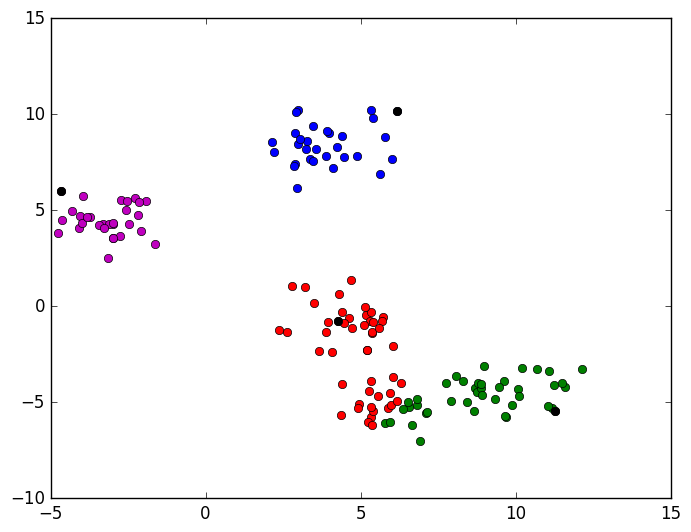

4-element Array{Int64,1}:
  18
 122
 114
 137

In [46]:
centros,lb=ffte(r,4);
plot_clusters(r,lb,centros)
centros

In [283]:
r1,y1 = datagen.make_moons(n_samples=1000,noise=0.05)

([0.503858 0.712387; 0.0146231 0.295635; … ; 0.421757 1.00849; -1.03412 0.101523], [0, 1, 1, 1, 1, 0, 1, 1, 1, 1  …  0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

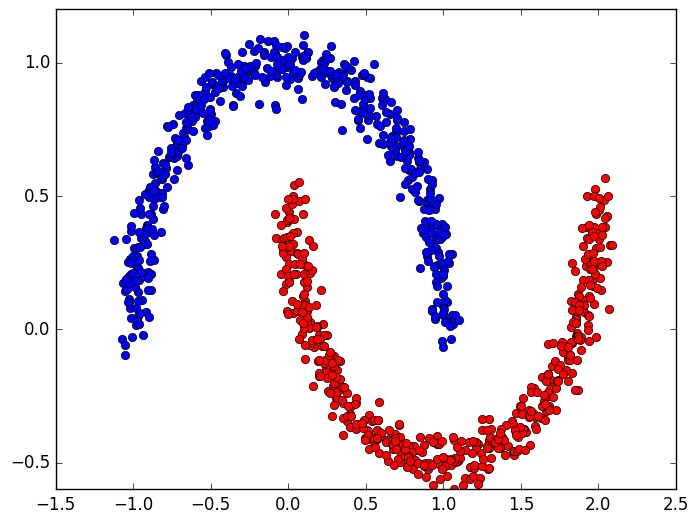

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14241b2e8>

In [284]:
plot_clusters(r1,y1,[])

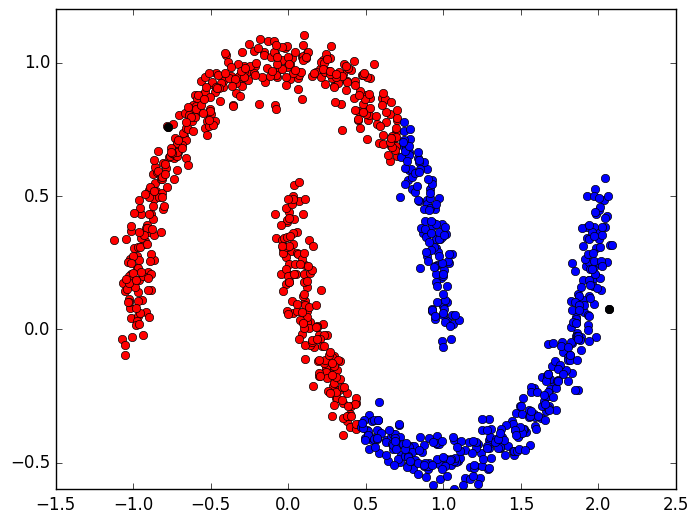

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x142da9da0>

In [290]:
centros1,lb1=ffte(r1,2);
plot_clusters(r1,lb1,centros1)

In [118]:
include("../src/fft.jl")

fft (generic function with 2 methods)

In [91]:
config=TextConfig(); config.nlist=[2]; config.qlist=[5];config.skiplist = []
tweets,vbows=list_of_items("../data/test.json","text",config);

In [127]:
c1=fft(vbows,tweets,config,"text","3","maxmin");

>>>>>>>>>>>>>>> 995 1.5707963267948966 342
>>>>>>>>>>>>>>> 991 1.5707963267948966 341
>>>>>>>>>>>>>>> 978 1.5707963267948966 340
>>>>>>>>>>>>>>> 1000 1.5707963267948966 155
>>>>>>>>>>>>>>> 996 1.5707963267948966 154
>>>>>>>>>>>>>>> 960 1.5707963267948966 153
>>>>>>>>>>>>>>> 998 1.5707963267948966 497
>>>>>>>>>>>>>>> 997 1.5707963267948966 496
>>>>>>>>>>>>>>> 990 1.5707963267948966 495


In [128]:
c1

12-element Array{Any,1}:
  129
  995
  991
  978
  907
 1000
  996
  960
  354
  998
  997
  990

In [123]:
c1

12-element Array{Any,1}:
 406
  14
   6
  13
 607
  37
   7
  33
 256
  18
   1
   3

In [114]:
angle_distance(vbows[37],vbows[7])

1.5707963267948966

In [ ]:
c